In [1]:
# !pip install imblearn

# Problem Statements: To Predict The Is Student Will Complete Course Or Not

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("attendence.xlsx")
df

,Batch,UG_Status,Job_status,Course_status,Distance
0,FST,Completed,No,Completed,50.000000
1,FST,Completed,No,Left,21.187097
2,FST,Completed,No,Left,20.000000
3,FST,Completed,No,Completed,20.000000
4,FST,Completed,Yes,Completed,40.000000
...,...,...,...,...,...
1027,FST2,Pursuing,No,Left,21.187097
1028,FST2,Pursuing,No,Completed,2.000000
1029,FST2,Pursuing,No,Completed,50.000000
1030,FST2,Pursuing,No,Completed,50.000000


In [4]:

print(df.isnull().sum())

# Replace null values with a default value, such as "Unknown" or 0
df.fillna(value={"column1": "Unknown", "column2": 0}, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check data types
print(df.dtypes)

# Convert columns to appropriate data types
df['Batch'] = df['Batch'].astype('category')
df['UG_Status'] = df['UG_Status'].astype('category')
df['Job_status'] = df['Job_status'].astype('category')
df['Course_status'] = df['Course_status'].astype('category')
df['Distance'] = df['Distance'].astype('float64')


Batch            0
UG_Status        0
Job_status       0
Course_status    0
Distance         0
dtype: int64
Batch             object
UG_Status         object
Job_status        object
Course_status     object
Distance         float64
dtype: object


In [5]:
df.describe()

,Distance
count,48.000000
mean,21.007258
std,14.072319
min,1.800000
25%,10.000000
50%,20.000000
75%,24.750000
max,50.000000


In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

In [7]:

# Convert categorical variables into numerical variables using one-hot encoding
encoder = OneHotEncoder()
X_cat = df[['UG_Status', 'Job_status', 'Course_status', 'Distance']]
X_cat_encoded = encoder.fit_transform(X_cat.drop(columns=['Distance']))
X_numerical = df[['Distance']]
X = np.hstack((X_cat_encoded.toarray(), X_numerical))


In [8]:
# Upsample the data using SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, df['Batch'])

X_resampled.shape

(48, 7)

In [9]:
# Convert the resampled data back to a DataFrame

columns = encoder.get_feature_names(['UG_Status', 'Job_status', 'Course_status'])
columns = list(columns) + ['Distance']

X_resampled_df = pd.DataFrame(X_resampled, columns=columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Batch'])
resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)


E:\Insatallesd\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
print(columns)

['UG_Status_Completed', 'UG_Status_Pursuing', 'Job_status_No', 'Job_status_Yes', 'Course_status_Completed', 'Course_status_Left', 'Distance']


In [11]:
resampled_df

,UG_Status_Completed,UG_Status_Pursuing,Job_status_No,Job_status_Yes,Course_status_Completed,Course_status_Left,Distance,Batch
0,1.0,0.0,1.0,0.0,1.0,0.0,50.000000,FST
1,1.0,0.0,1.0,0.0,0.0,1.0,21.187097,FST
2,1.0,0.0,1.0,0.0,0.0,1.0,20.000000,FST
3,1.0,0.0,1.0,0.0,1.0,0.0,20.000000,FST
4,1.0,0.0,0.0,1.0,1.0,0.0,40.000000,FST
5,1.0,0.0,1.0,0.0,1.0,0.0,10.000000,FST
6,1.0,0.0,1.0,0.0,1.0,0.0,6.000000,FST
7,0.0,1.0,1.0,0.0,1.0,0.0,10.000000,FST
8,1.0,0.0,1.0,0.0,1.0,0.0,15.000000,FST
9,0.0,1.0,1.0,0.0,1.0,0.0,15.000000,FST


In [12]:
resampled_df.shape

(48, 8)

<AxesSubplot:title={'center':'Distance'}>

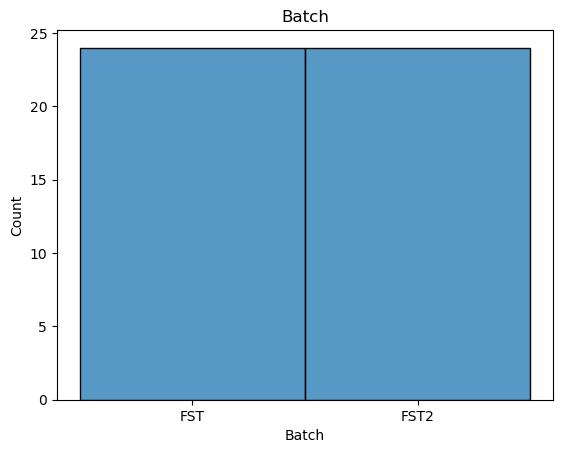

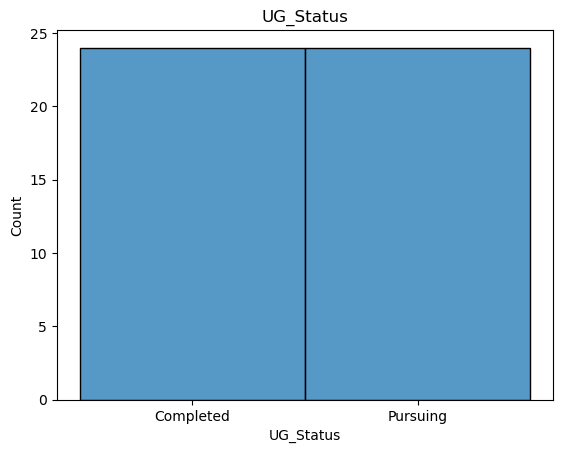

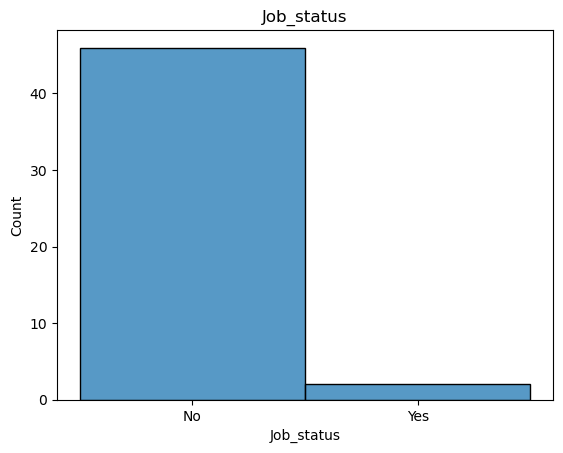

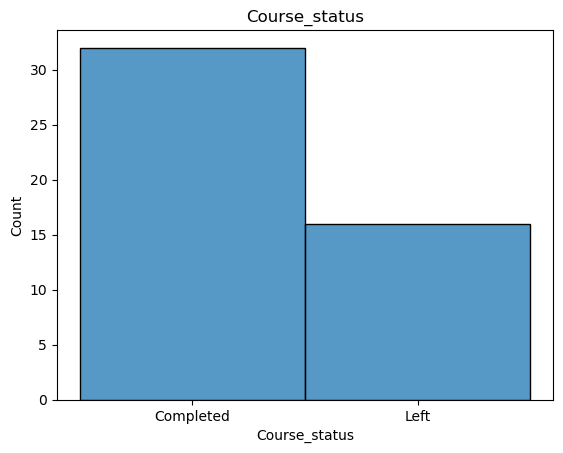

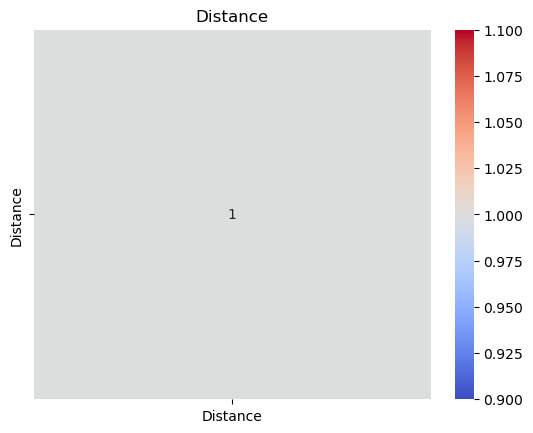

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the distribution of each column
for col in df.columns:
    plt.figure()
    sns.histplot(df[col], kde=False)
    plt.title(col)

# Get the correlation between columns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

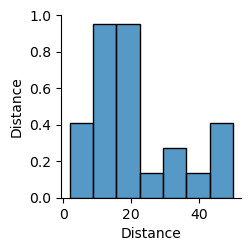

In [14]:
# Get the count of each unique value in the categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        plt.figure()
        sns.countplot(df[col])
        plt.title(col)

# Get the pairwise relationships between the columns
sns.pairplot(df)


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('UG_Status', axis=1) # features
y = df['UG_Status'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Batch', 'Job_status', 'Course_status']
numerical_cols = ['Distance']


# One-hot encode categorical features
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train[categorical_cols])
X_test_ohe = ohe.transform(X_test[categorical_cols])

# Concatenate one-hot encoded features with numerical features
X_train_final = np.concatenate([X_train_ohe.toarray(), X_train[numerical_cols]], axis=1)
X_test_final = np.concatenate([X_test_ohe.toarray(), X_test[numerical_cols]], axis=1)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train logistic regression classifier
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train_final, y_train)

# Make predictions on test set
y_pred_lr = clf_lr.predict(X_test_final)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of logistic regression classifier:", accuracy_lr)


Accuracy of logistic regression classifier: 0.26666666666666666


In [18]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train_final, y_train)

# Make predictions on test set
y_pred_dt = clf_dt.predict(X_test_final)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of decision tree classifier:", accuracy_dt)


Accuracy of decision tree classifier: 0.4


In [19]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Assume you have X_train_final and y_train as your training data
# Train logistic regression classifier
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train_final, y_train)

# Train decision tree classifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train_final, y_train)

# Save the trained models using pickle
pickle.dump(clf_lr, open("lr_model.pkl", "wb"))
pickle.dump(clf_dt, open("dt_model.pkl", "wb"))


In [20]:
# Load the saved models using pickle
lr_model = pickle.load(open("lr_model.pkl", "rb"))
dt_model = pickle.load(open("dt_model.pkl", "rb"))


In [21]:
from flask import Flask, request, jsonify
import pandas as pd
import numpy as np
import pickle


In [22]:
import pickle
from sklearn.preprocessing import OneHotEncoder

# Load data
df = pd.read_excel("attendence.xlsx")
X = df.drop('UG_Status', axis=1) # features

# Define categorical columns for one-hot encoding
categorical_cols = ['Batch', 'Job_status', 'Course_status']

# Fit and save one-hot encoders
ohe_cat = OneHotEncoder()
ohe_cat.fit(X[categorical_cols])
with open('ohe_cat.pkl', 'wb') as f:
    pickle.dump(ohe_cat, f)

ohe_batch = OneHotEncoder()
ohe_batch.fit(X[['Batch']])
with open('ohe_batch.pkl', 'wb') as f:
    pickle.dump(ohe_batch, f)


In [23]:
# Load the trained models
lr_model = pickle.load(open("lr_model.pkl", "rb"))
dt_model = pickle.load(open("dt_model.pkl", "rb"))

# Load the one-hot encoders
ohe_cat = pickle.load(open("ohe_cat.pkl", "rb"))
ohe_batch = pickle.load(open("ohe_batch.pkl", "rb"))


In [25]:
# import pandas as pd
# import numpy as np
import pickle
import joblib
from sklearn.preprocessing import StandardScaler

# # Load a model
# model = joblib.load('lr_model.pkl')

# # Save a model
# joblib.dump(model, 'lr_model.pkl')

# # Load the trained models
# lr_model = pickle.load(open("lr_model.pkl", "rb"))
# dt_model = pickle.load(open("dt_model.pkl", "rb"))

# # Load the one-hot encoders
# ohe_cat = pickle.load(open("ohe_cat.pkl", "rb"))
# ohe_batch = pickle.load(open("ohe_batch.pkl", "rb"))

# def predict(data):
#     # Get the user inputs from the request object
#     distance = data['distance']
#     batch = data['batch']
#     job_status = data['job_status']
#     course_status = data['course_status']
#     ug_status = data['ug_status']

#     # Transform the user inputs into a dataframe
#     df = pd.DataFrame([[distance, batch, job_status, course_status, ug_status]],
#                       columns=['Distance', 'Batch', 'Job_status', 'Course_status', 'UG_Status'])

#     # One-hot encode categorical features
#     cat_cols = ['Job_status', 'Course_status']
#     cat_df = df[cat_cols]
#     cat_df = ohe_cat.transform(cat_df).toarray()

#     batch_col = ['Batch']
#     batch_df = df[batch_col]
#     batch_df = ohe_batch.transform(batch_df).toarray()

#     # Combine the one-hot encoded features with the numerical features
#     num_cols = ['Distance']
#     num_df = df[num_cols]

#     features = np.concatenate([cat_df, batch_df, num_df], axis=1)

#     # Make predictions using the logistic regression and decision tree models
#     lr_prediction = lr_model.predict(features)[0]
#     dt_prediction = dt_model.predict(features)[0]

#     # Return the predictions as a dictionary
#     return {'lr_prediction': lr_prediction, 'dt_prediction': dt_prediction}

# # Save the models and encoders
# pickle.dump(lr_model, open("lr_model.pkl", "wb"))
# pickle.dump(dt_model, open("dt_model.pkl", "wb"))
# pickle.dump(ohe_cat, open("ohe_cat.pkl", "wb"))
# pickle.dump(ohe_batch, open("ohe_batch.pkl", "wb"))

# Create StandardScaler object
ss_num = StandardScaler()

# Fit and transform the numerical data
num_df = ss_num.fit_transform(df[num_cols])

# Save the ss_num object using joblib
joblib.dump(ss_num, 'ss_num.joblib')

def predict(data):
    # load the model and preprocessors
    model = joblib.load('lr_model.pkl')
    ohe_cat = joblib.load('ohe_cat.pkl')
    ss_num = joblib.load('ss_num.joblib')

    # preprocess the input data
    df = pd.DataFrame(data, index=[0])
    num_cols = ['Distance']
    num_df = df[num_cols]
    num_df = ss_num.transform(num_df)

    cat_cols = ['Job_status', 'Course_status', 'ug_status']
    cat_df = df[cat_cols]
    cat_df = ohe_cat.transform(cat_df).toarray()

    batch_col = ['Batch']
    batch_df = df[batch_col]

    # combine the preprocessed data
    X = np.concatenate([num_df, cat_df], axis=1)

    # make predictions
    y_pred = model.predict(X)

    # return the predictions
    return y_pred[0]


NameError: name 'num_cols' is not defined

In [ ]:
data = {'distance': 10, 'batch': 'FST', 'job_status': 'No', 'course_status':'completed', "ug_status": "pursuing"}
predict(data)
